# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

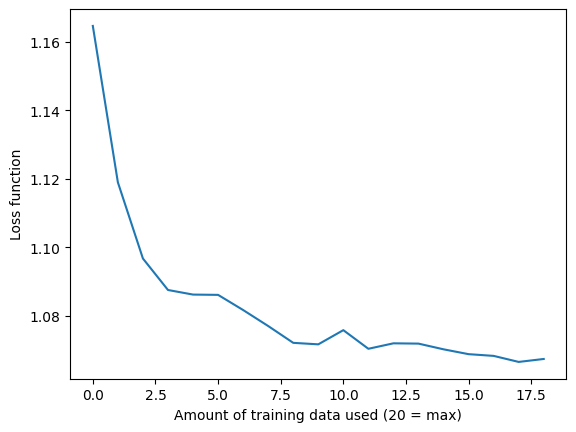

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

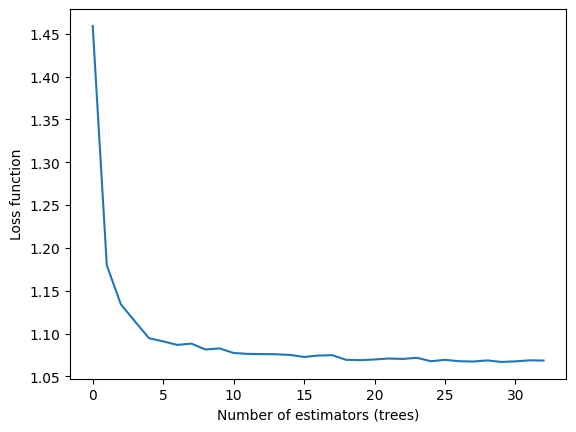

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

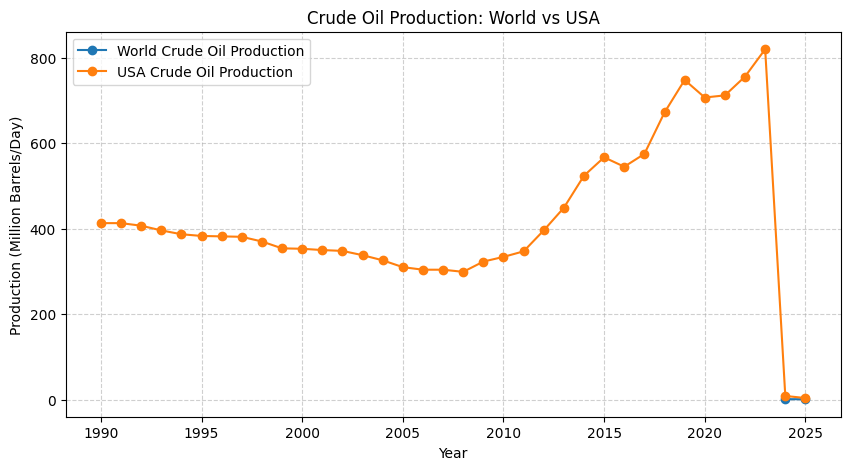

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean
file_path = "COP.csv"
df = pd.read_csv(file_path, encoding='latin1')
df = df.dropna(axis=1, how='all').iloc[5:].reset_index(drop=True)
df.columns = ["Country"] + [f"Y{i}" for i in range(1, df.shape[1])]

# Drop rows without a country name
df = df.dropna(subset=['Country'])

# Convert all columns except Country to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Extract World and USA rows safely
world_row = df[df['Country'].str.contains('World', case=False, na=False)].iloc[0, 1:].values
usa_row = df[df['Country'].str.contains('United States', case=False, na=False)].iloc[0, 1:].values

# Build year range
years = list(range(1990, 1990 + len(world_row)))

# Plot
plt.figure(figsize=(10,5))
plt.plot(years, world_row, marker='o', label='World Crude Oil Production')
plt.plot(years, usa_row, marker='o', label='USA Crude Oil Production')
plt.title("Crude Oil Production: World vs USA")
plt.xlabel("Year")
plt.ylabel("Production (Million Barrels/Day)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1. Prepare features (X) and target (y)
usa_series = usa_row  # From the previous code
X, y = [], []
window = 3  # Use past 3 years to predict next year

for i in range(len(usa_series) - window):
    X.append(usa_series[i:i+window])
    y.append(usa_series[i+window])

X = np.array(X)
y = np.array(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 2. Implement Random Forest
rf = RandomForestRegressor(random_state=42)

# 3. Cross-validation (R² score)
cv_scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# 4. Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 3, 5]
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# 5. Evaluate on Test Set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test R²:", r2_score(y_test, y_pred))


Cross-validation R² scores: [-23.3071762  -10.30915309  -1.71705617]
Average CV R²: -11.777795150918088
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Test R²: 0.22500388771437363


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

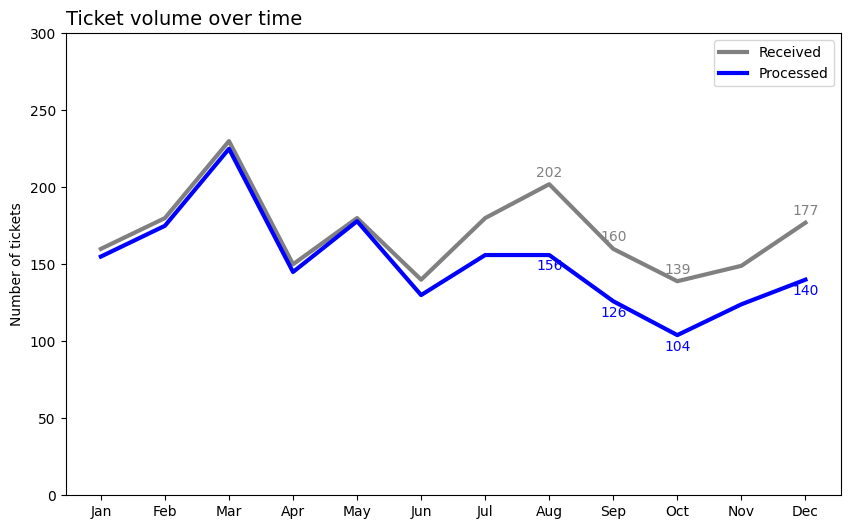

In [16]:
import matplotlib.pyplot as plt

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
received = [160, 180, 230, 150, 180, 140, 180, 202, 160, 139, 149, 177]
processed = [155, 175, 225, 145, 178, 130, 156, 156, 126, 104, 124, 140]

plt.figure(figsize=(10,6))

plt.plot(months, received, color='gray', linewidth=3, label="Received")
plt.plot(months, processed, color='blue', linewidth=3, label="Processed")

for i, val in enumerate(received):
    if i in [7, 8, 9, 11]:  
        plt.text(i, val+5, str(val), color='gray', ha='center')

for i, val in enumerate(processed):
    if i in [7, 8, 9, 11]:
        plt.text(i, val-10, str(val), color='blue', ha='center')

plt.title("Ticket volume over time", fontsize=14, loc='left')
plt.ylabel("Number of tickets")
plt.ylim(0, 300)



plt.legend()
plt.show()